In [1]:
import sys
sys.path.append('../')

from PIL import Image
import numpy as np
import albumentations as A
import utils.preprocessor as preprocessor
import cv2
import matplotlib.pyplot as plt

from utils.visualize_data import display_PIL_image

# To allow auto reload to this notebook after modifying any external file imported
%load_ext autoreload
%autoreload 2

In [2]:
image_path = '../datasets/challenge1/train/nevus/nev05282.jpg'
image = Image.open(image_path)
print(image.size)

(600, 450)


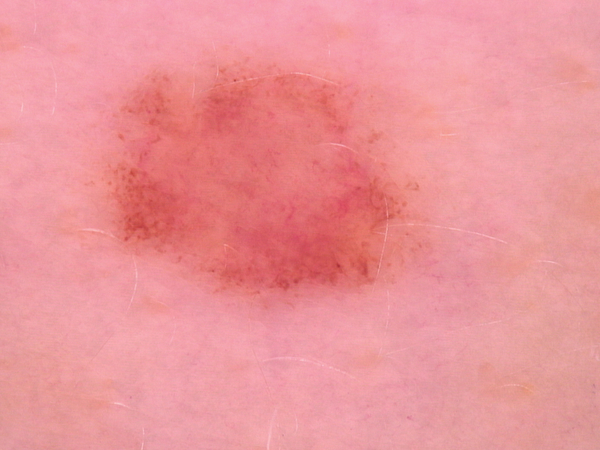

In [3]:
display_PIL_image(image)

Augmenting Hair

Plotting hair

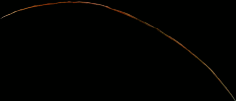

(236, 101)


In [4]:
hair = '../datasets/skin_hairs/mel01332.png'
hair = Image.open(hair)
display_PIL_image(hair)
print(hair.size)

(101, 236, 3)


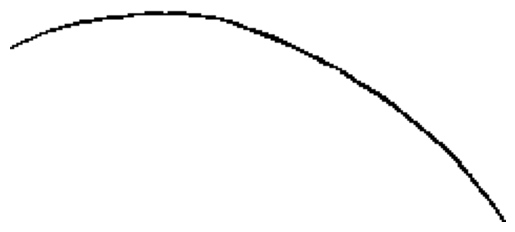

In [5]:
hair2 = '../datasets/skin_hairs/mel01332.png'
hair2 = cv2.imread(hair2)
print(hair2.shape)
img2gray = cv2.cvtColor(hair2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

plt.imshow(mask_inv, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
transform = A.Compose([
    preprocessor.AdvancedHairAugmentation(
        hairs_folder='../datasets/skin_hairs/')
])

In [8]:
image_path = '../datasets/challenge1/train/nevus/nev05282.jpg'
image = Image.open(image_path)
print(image.size)

(600, 450)


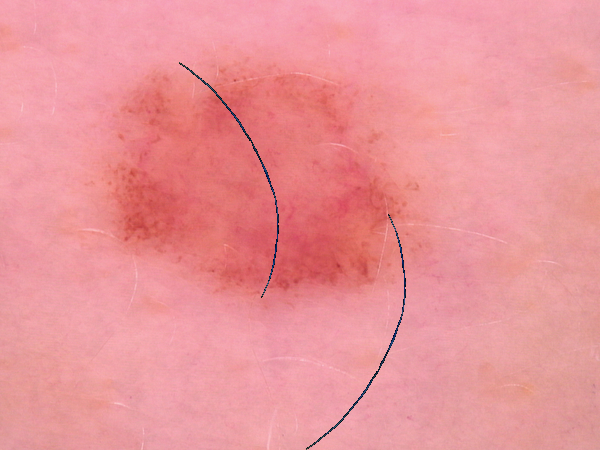

In [10]:
transformed_image = transform(image=np.array(image))['image']
display_PIL_image(transformed_image)